# 1.1

In [88]:
import numpy as np
import matplotlib.pyplot as plt

AV = [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
Ones = [15,20,25,15,20,25]
N=240

TC = np.zeros((6,240))

for i in range(len(AV)):
    TC[i] = np.zeros((1,240))
    start = AV[i]
    while start < (N-20) :
        for j in range(Ones[i]):
            TC[i][start+j] = np.ones(1)
        start += IV[i]
    TC[i]-=np.mean(TC[i])
    TC[i]/=np.std(TC[i])

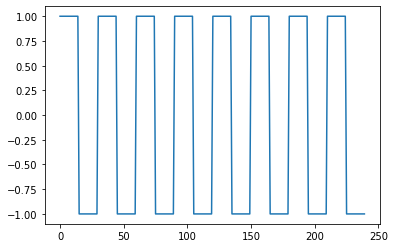

In [89]:
plt.plot(TC[0])

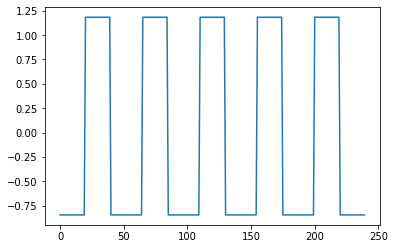

In [90]:
plt.plot(TC[1])

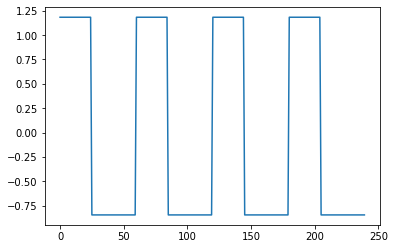

In [91]:
plt.plot(TC[2])

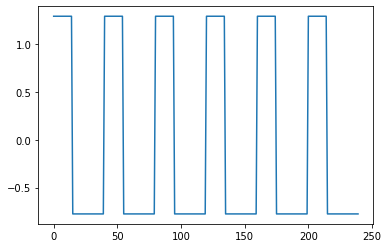

In [92]:
plt.plot(TC[3])

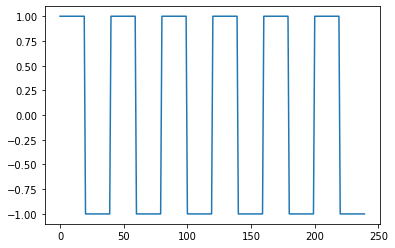

In [93]:
plt.plot(TC[4])

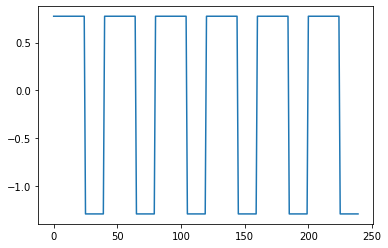

In [94]:
plt.plot(TC[5])

Standardize instead of Normalize because the variables follow Gaussian Distribution with mean 0 because the values are only 1 and 0.

# 1.2

<AxesSubplot:>

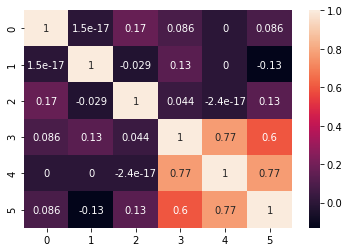

In [95]:
import seaborn as sns
sns.heatmap(np.corrcoef(TC), annot = True)

From the Correlation Matrix, we see that TC 3 and 4 are most correlated.

# 1.3 

<AxesSubplot:>

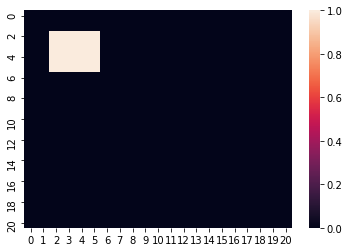

In [96]:
tmpSM_0 = np.zeros((21,21))
tmpSM_0[2:6,2:6] = np.ones((4,4))
sns.heatmap(tmpSM_0)

<AxesSubplot:>

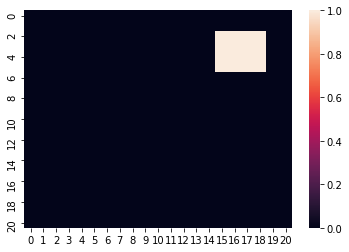

In [97]:
tmpSM_1 = np.zeros((21,21))
tmpSM_1[2:6,15:19] = np.ones((4,4))
sns.heatmap(tmpSM_1)

<AxesSubplot:>

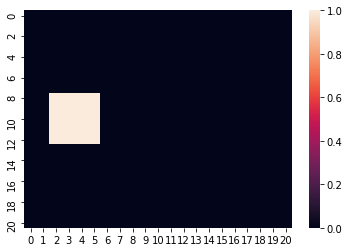

In [98]:
tmpSM_2 = np.zeros((21,21))
tmpSM_2[8:13, 2:6] = np.ones((5,4))
sns.heatmap(tmpSM_2)

<AxesSubplot:>

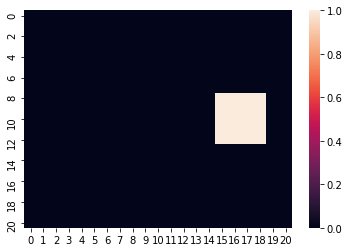

In [99]:
tmpSM_3 = np.zeros((21,21))
tmpSM_3[8:13, 15:19] = np.ones((5,4))
sns.heatmap(tmpSM_3)

<AxesSubplot:>

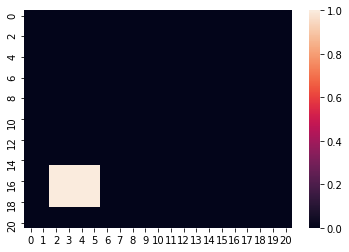

In [100]:
tmpSM_4 = np.zeros((21,21))
tmpSM_4[15:19, 2:6] = np.ones((4,4))
sns.heatmap(tmpSM_4)

<AxesSubplot:>

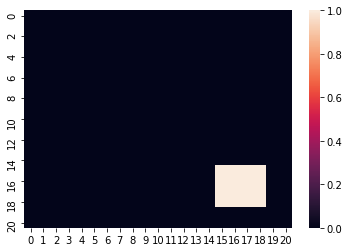

In [101]:
tmpSM_5 = np.zeros((21,21))
tmpSM_5[15:19, 15:19] = np.ones((4,4))
sns.heatmap(tmpSM_5, cmap = 'rocket')

In [102]:
tmpSM=np.empty((6),dtype=object)
tmpSM[0]=tmpSM_0
tmpSM[1]=tmpSM_1
tmpSM[2]=tmpSM_2
tmpSM[3]=tmpSM_3
tmpSM[4]=tmpSM_4
tmpSM[5]=tmpSM_5

In [103]:
SM=np.empty((6,441))
for i in range(len(tmpSM)):
    SM[i]=tmpSM[i].flatten()

<AxesSubplot:>

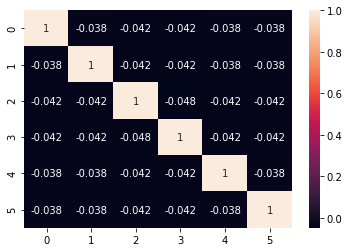

In [104]:
sns.heatmap(np.corrcoef(SM), annot = True)

From the CM we can see that these vectored SMs are not correlated but this is not enough to justify independence. Standardization is not important because each vectors already have the same mean and standard deviation so standardization does not change anything.

# 1.4

In [155]:
from math import sqrt
temporal_noise=np.random.normal(0,sqrt(0.25),TC.shape)
temporal_noise.shape

(6, 240)

<AxesSubplot:>

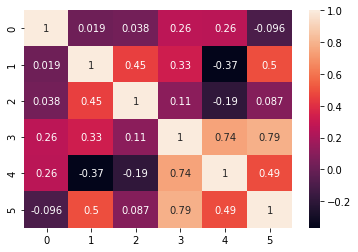

In [163]:
TC_noise = np.dot(TC,temporal_noise.T)
sns.heatmap(np.corrcoef(TC_noise),annot=True)

c:\users\janice\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

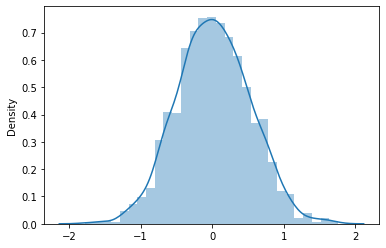

In [161]:
sns.distplot(temporal_noise)

In [162]:
spatial_noise=np.random.normal(0,0.015,SM.shape)
spatial_noise.shape

(6, 441)

<AxesSubplot:>

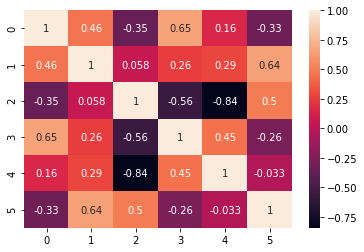

In [165]:
SM_noise = np.dot(SM,spatial_noise.T)
sns.heatmap(np.corrcoef(SM_noise),annot=True)

c:\users\janice\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

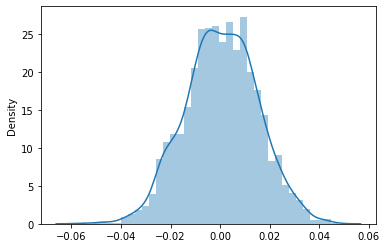

In [166]:
sns.distplot(spatial_noise)

In [167]:
X=np.empty((240,441))
A=TC+temporal_noise
B=SM+spatial_noise
X=np.dot(A.T,B)

In [168]:
X.shape

(240, 441)

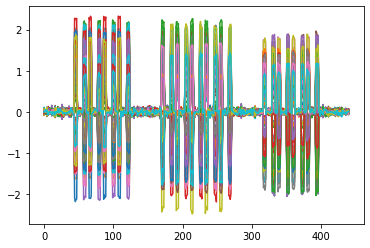

In [169]:
from random import randint

plt.subplot()
for i in range(100):
    value = randint(0,239)
    plt.plot(X[value])
    